In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import warnings
warnings.filterwarnings('ignore')
import joblib 

ModuleNotFoundError: No module named 'tensorflow'

In [5]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Collecting tensorflow
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Obtaining dependency informatio


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



   ----------------- -------------------- 171.5/377.0 MB 561.5 kB/s eta 0:06:06
   ----------------- -------------------- 171.6/377.0 MB 562.0 kB/s eta 0:06:06
   ----------------- -------------------- 171.6/377.0 MB 563.0 kB/s eta 0:06:05
   ----------------- -------------------- 171.7/377.0 MB 563.4 kB/s eta 0:06:05
   ----------------- -------------------- 171.8/377.0 MB 563.9 kB/s eta 0:06:04
   ----------------- -------------------- 171.9/377.0 MB 564.4 kB/s eta 0:06:04
   ----------------- -------------------- 172.0/377.0 MB 567.3 kB/s eta 0:06:02
   ----------------- -------------------- 172.0/377.0 MB 566.3 kB/s eta 0:06:02
   ----------------- -------------------- 172.1/377.0 MB 567.3 kB/s eta 0:06:02
   ----------------- -------------------- 172.2/377.0 MB 568.8 kB/s eta 0:06:00
   ----------------- -------------------- 172.3/377.0 MB 570.8 kB/s eta 0:05:59
   ----------------- -------------------- 172.4/377.0 MB 572.3 kB/s eta 0:05:58
   ----------------- ------------------

In [29]:
data = pd.read_csv('apple_stock.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,38.722500,39.712502,38.557499,39.480000,37.845047,148158800
1,2019-01-03,35.994999,36.430000,35.500000,35.547501,34.075394,365248800
2,2019-01-04,36.132500,37.137501,35.950001,37.064999,35.530056,234428400
3,2019-01-07,37.174999,37.207500,36.474998,36.982498,35.450966,219111200
4,2019-01-08,37.389999,37.955002,37.130001,37.687500,36.126770,164101200


In [30]:
data['Date'] = pd.to_datetime(data['Date'])
df = data.set_index('Date')
ds = df[['Close']]

ds

,Close
Date,
2019-01-02,39.480000
2019-01-03,35.547501
2019-01-04,37.064999
2019-01-07,36.982498
2019-01-08,37.687500
...,...
2024-01-25,194.169998
2024-01-26,192.419998
2024-01-29,191.729996


In [34]:
# Convert the dataframe to a numpy array
dx = ds.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dx) * .95 ))

training_data_len

1216

In [35]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dx)

scaled_data

array([[0.02419069],
       [0.        ],
       [0.00933486],
       ...,
       [0.96075353],
       [0.93805455],
       [0.91566317]])

In [36]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.02419069, 0.        , 0.00933486, 0.00882736, 0.01316416,
       0.01710111, 0.01785467, 0.01553247, 0.01201076, 0.01673203,
       0.01960784, 0.02102268, 0.02249905, 0.01708574, 0.01803921,
       0.01616301, 0.02394462, 0.02169935, 0.01920798, 0.03546328,
       0.03729335, 0.03741638, 0.0446905 , 0.04919645, 0.04928874,
       0.04421376, 0.04339869, 0.04189157, 0.04413687, 0.04304497,
       0.04399846, 0.04341406, 0.04419837, 0.04589004, 0.0443983 ,
       0.04733564, 0.04927335, 0.04942714, 0.05025758, 0.04761244,
       0.05041138, 0.05176471, 0.05127258, 0.04971934, 0.04661284,
       0.04724337, 0.0564552 , 0.05954633, 0.06077663, 0.06388311,
       0.06755862, 0.07048059, 0.06818915, 0.07069589, 0.08135332,
       0.07514033, 0.07158786, 0.06858899, 0.07117262, 0.07155709])]
[0.07344866513930937]

[array([0.02419069, 0.        , 0.00933486, 0.00882736, 0.01316416,
       0.01710111, 0.01785467, 0.01553247, 0.01201076, 0.01673203,
       0.01960784, 0.02102268, 0.02

In [38]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 0.0839
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0016
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0011
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 9.7109e-04
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 9.1601e-04
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 9.0421e-04
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 9.2648e-04
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 8.8461e-04
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 9.5400e-04
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 8.2205e-04


In [39]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dx[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 404ms/step


4.658400269152885

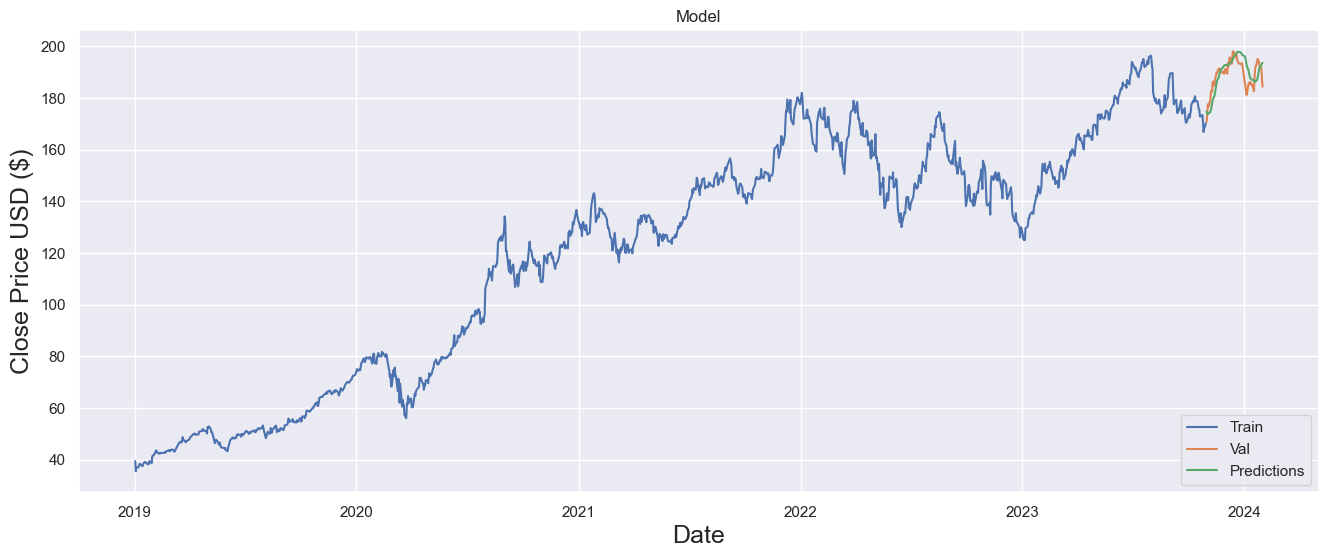

In [42]:
# Plot the data
sns.set(style = 'darkgrid')

train = ds[:training_data_len]
valid = ds[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [51]:
valid

,Close,Predictions
Date,,
2023-10-31,170.770004,174.729233
2023-11-01,173.970001,174.013474
2023-11-02,177.570007,173.730957
2023-11-03,176.649994,173.999771
2023-11-06,179.229996,174.514450
...,...,...
2024-01-25,194.169998,190.527679
2024-01-26,192.419998,191.758118
2024-01-29,191.729996,192.719360


In [49]:
# Save the trained model
model.save("lstm_timeSeries.h5")
model.save('lstm_timeSeries.keras')

In [50]:
from keras.models import load_model

# Load the saved model
loaded_model = load_model("lstm_timeSeries.keras")